## Lab Exercise 3
### Loading the dataset

In [1]:
import pandas as pd
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Preprocessing and EDA

In [2]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


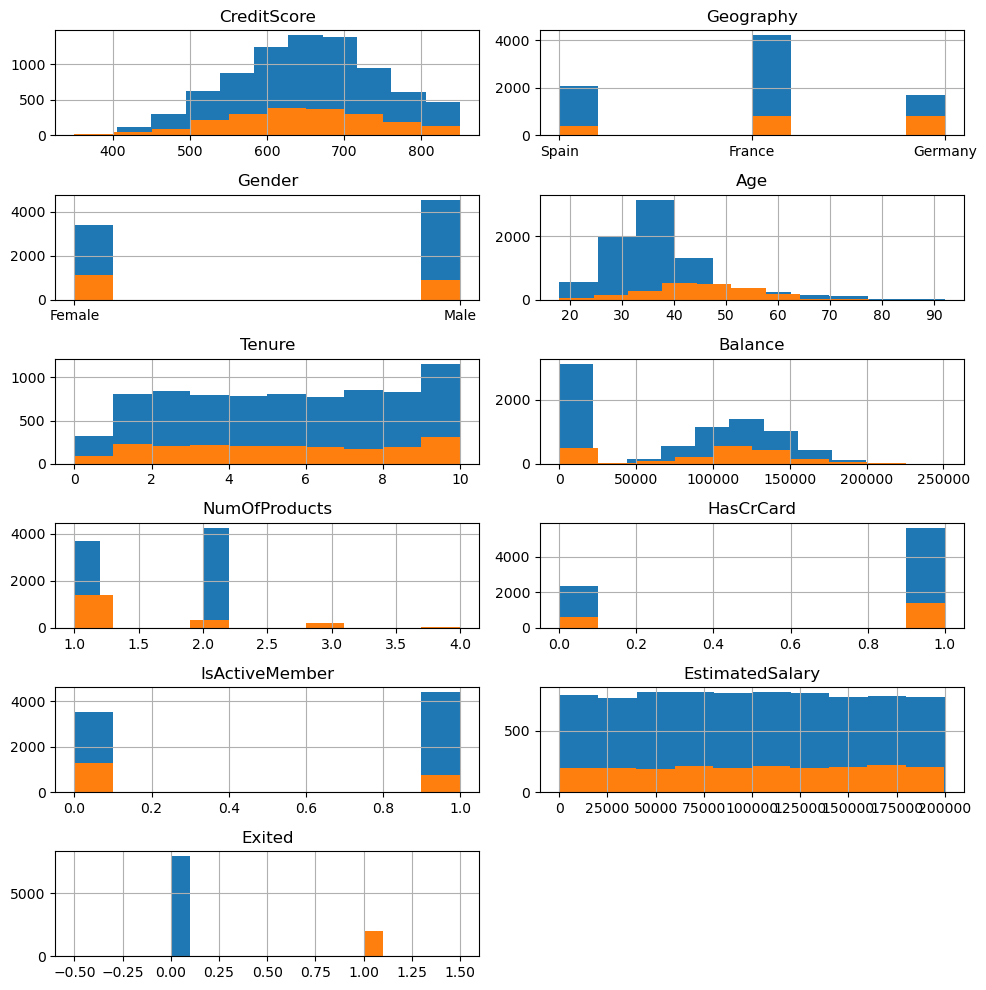

In [5]:
import matplotlib.pyplot as plt
f=plt.figure(figsize=(10,10))
for i,j in enumerate(data.columns):
    f.add_subplot(6,2,i+1)
    data[data['Exited'] == 0][j].hist()
    data[data['Exited'] == 1][j].hist()
    plt.title(j)
plt.tight_layout()

In [6]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

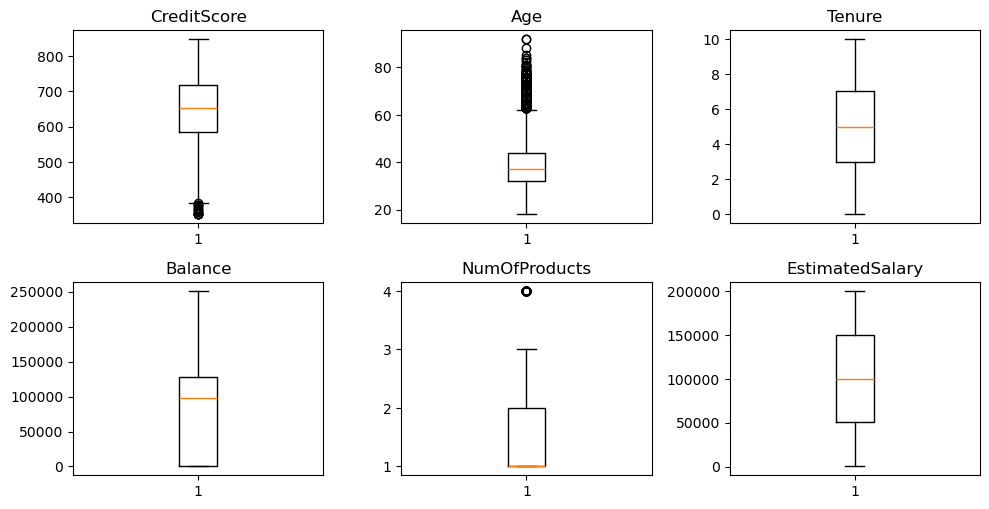

In [7]:
f =  plt.figure(figsize=(10,10))
for i,j in enumerate(['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']):
    f.add_subplot(4,3,i+1)
    plt.boxplot(data[j])
    plt.title(j)
plt.tight_layout()

In [8]:
import numpy as np
from scipy import stats
def drop_outlier(data,col_name):
  z = np.abs(stats.zscore(data[col_name]))
  data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape post deletion of outliers from ",col_name,": "+str(data.shape))
for i in ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']:
    drop_outlier(data,i)

New data shape post deletion of outliers from  CreditScore : (9974, 11)
New data shape post deletion of outliers from  Age : (9711, 11)
New data shape post deletion of outliers from  Tenure : (9711, 11)
New data shape post deletion of outliers from  Balance : (9709, 11)
New data shape post deletion of outliers from  NumOfProducts : (9395, 11)
New data shape post deletion of outliers from  EstimatedSalary : (9395, 11)


In [9]:
for i in ['CreditScore','Age','Balance','EstimatedSalary']:
    data[i]=(data[i]-data[i].mean())/data[i].std()
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.332536,France,Female,0.456594,2,-1.226371,1,1,1,0.025400,1
1,-0.447302,Spain,Female,0.346276,1,0.117159,1,0,1,0.219849,0
3,0.502119,France,Female,0.125641,1,-1.226371,2,0,0,-0.105272,0
4,2.077533,Spain,Female,0.566912,2,0.785703,1,1,1,-0.361369,0
5,-0.061273,Spain,Male,0.677229,8,0.597257,2,1,0,0.866308,1


In [10]:
data=pd.get_dummies(data,columns=['Geography'])
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-0.332536,Female,0.456594,2,-1.226371,1,1,1,0.025400,1,True,False,False
1,-0.447302,Female,0.346276,1,0.117159,1,0,1,0.219849,0,False,False,True
3,0.502119,Female,0.125641,1,-1.226371,2,0,0,-0.105272,0,True,False,False
4,2.077533,Female,0.566912,2,0.785703,1,1,1,-0.361369,0,False,False,True
5,-0.061273,Male,0.677229,8,0.597257,2,1,0,0.866308,1,False,False,True


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Gender','Geography_France','Geography_Germany','Geography_Spain']:
    data[i]=le.fit_transform(data[i])
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-0.332536,0,0.456594,2,-1.226371,1,1,1,0.025400,1,1,0,0
1,-0.447302,0,0.346276,1,0.117159,1,0,1,0.219849,0,0,0,1
3,0.502119,0,0.125641,1,-1.226371,2,0,0,-0.105272,0,1,0,0
4,2.077533,0,0.566912,2,0.785703,1,1,1,-0.361369,0,0,0,1
5,-0.061273,1,0.677229,8,0.597257,2,1,0,0.866308,1,0,0,1


In [12]:
X=data.drop(columns='Exited')
Y=data['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

### Fitting Models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
LR=LogisticRegression().fit(X_train,Y_train)
LR_pred=LR.predict(X_test)
RF=RandomForestClassifier().fit(X_train,Y_train)
RF_pred=RF.predict(X_test)

### Model Evaluation

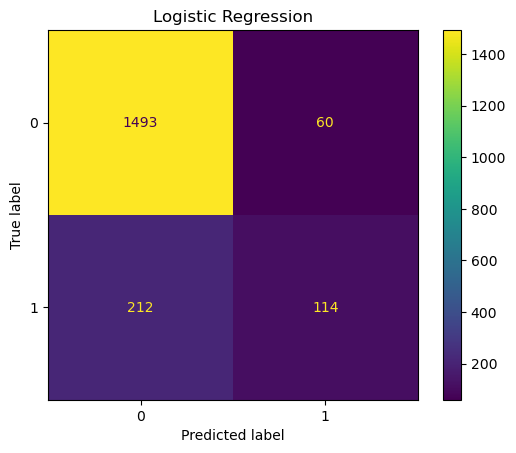

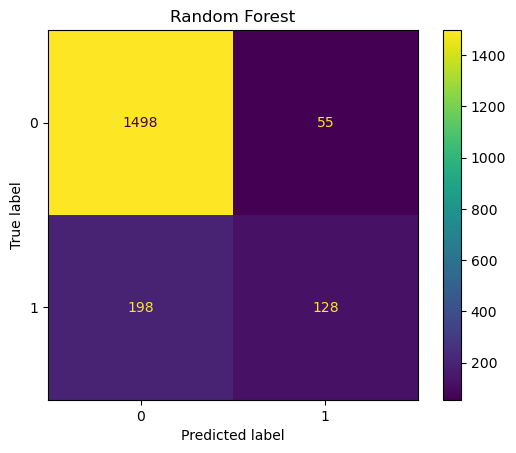

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,LR_pred)).plot()
plt.title('Logistic Regression')
plt.show()
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,RF_pred)).plot()
plt.title('Random Forest')
plt.show()

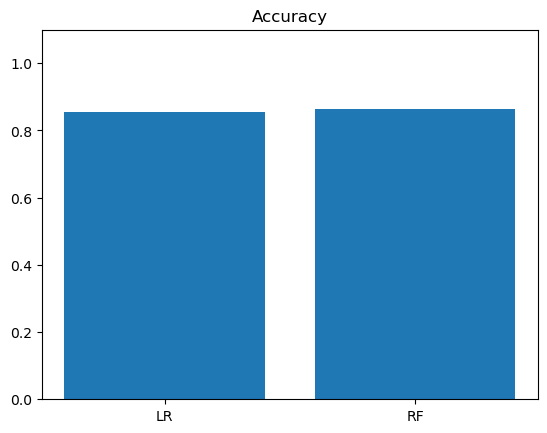

In [19]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(Y_test,LR_pred)
accuracy2=accuracy_score(Y_test,RF_pred)
plt.bar(['LR','RF'],[accuracy1,accuracy2])
plt.title("Accuracy")
plt.ylim(0,1.1)
plt.show()

#### We see that the accuracy RF is higher as the TP and TN values are greater than that of LR.

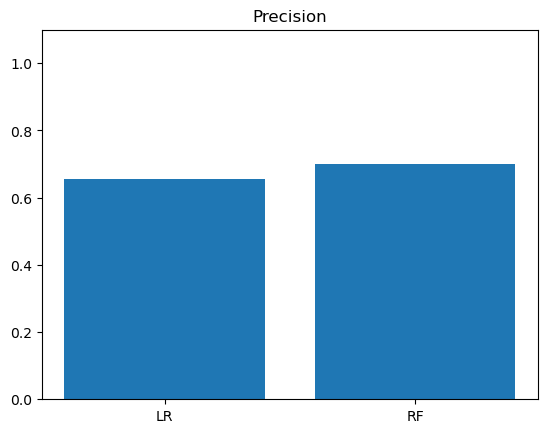

In [20]:
from sklearn.metrics import precision_score
precision1=precision_score(Y_test,LR_pred)
precision2=precision_score(Y_test,RF_pred)
plt.bar(['LR','RF'],[precision1,precision2])
plt.ylim(0,1.1)
plt.title("Precision")
plt.show()

#### The precision is less because FP is more

Text(0.5, 1.0, 'Recall')

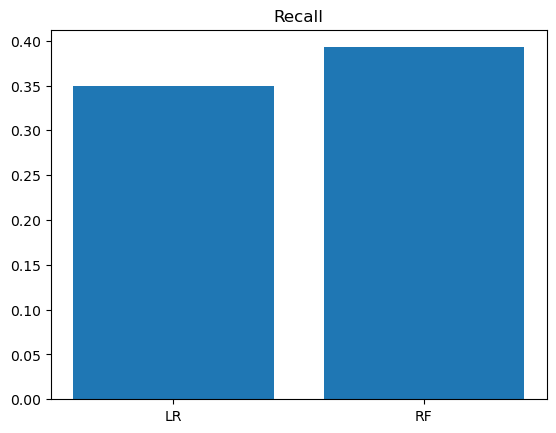

In [22]:
from sklearn.metrics import recall_score
recall1=recall_score(Y_test,LR_pred)
recall2=recall_score(Y_test,RF_pred)
plt.bar(['LR','RF'],[recall1,recall2])
plt.title("Recall")

#### Recall is less because FN is more.

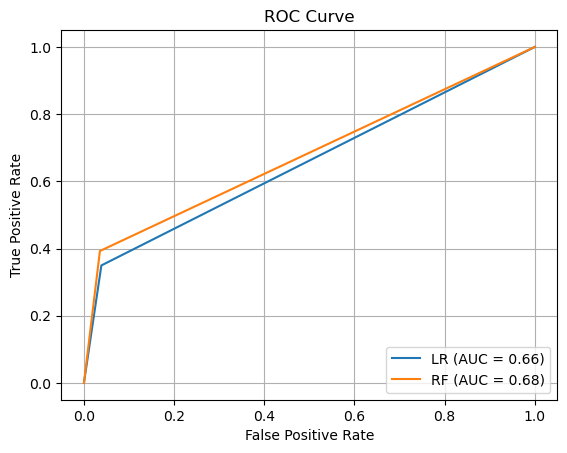

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_model1,tpr_model1,_=roc_curve(Y_test,LR_pred)
roc_auc_model1=roc_auc_score(Y_test,LR_pred)
fpr_model2,tpr_model2,_=roc_curve(Y_test,RF_pred)
roc_auc_model2=roc_auc_score(Y_test,RF_pred)
plt.plot(fpr_model1, tpr_model1, label='LR (AUC = {:.2f})'.format(roc_auc_model1))
plt.plot(fpr_model2, tpr_model2, label='RF (AUC = {:.2f})'.format(roc_auc_model2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### The AUC is nearly 0.67 which tells us it will predict rightly only 2 out of 3 times, which makes it unreliable.

### Report
#### Preprocessing: Feature Selection, Null value check, Outlier removal, Label encoding, One hot encoding, standardisation
#### Model Selection : Logistic Regression and Random Forest
#### Evaluation Matrix: Accuracy, Precision, Recall, ROC-AUC
#### By performing all the above operations and seeing the results we can say that the model isn't reliable. To imporve this we can balance the data by upsamling which could give better results.

## End